In [1]:
import os
main_dir = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(main_dir)

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

import os
import csv
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import tqdm

import karras.dnnlib as dnnlib
from ours.dataset import DATASET_OPTIONS, get_dataset_kwargs
import Images.download_metrics as met

%load_ext autoreload
%autoreload 2

/home/valeria/anaconda3/envs/SCIDev/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Parameters

In [2]:
dataset_name = "tiny"
run_ids = ["4giyu6ty", "nue64z6i"] # Each group has two runs, one per GPU
relative_dir = "Images/03_TinyImageNet/AJEST/00"
ajest_N = 16

filename = "indices_2.csv"
max_epochs = 1

### Secondary parameters

In [3]:
folder = os.path.join(dirs.MODELS_HOME, relative_dir, "indices")
filepath = os.path.join(folder, filename)

## Get indices data

### Download from W&B and store it on a CSV file

In [ ]:
met.download_metrics(run_ids, filepath, max_epochs=1)

1it [00:10, 10.92s/it]


### Load data from CSV file

In [4]:
indices_data = np.loadtxt(filepath, skiprows=1,delimiter=",",dtype=np.int32)

In [5]:
n_ranks = int(max(indices_data[:,0])+1)
n_epochs = int(max(indices_data[:,1])+1)
n_rounds = int(max(indices_data[:,2])+1)

## Plot images from indices data

### Load dataset

In [6]:
# Load dataset
dataset_kwargs = get_dataset_kwargs(dataset_name)
dataset = dnnlib.util.construct_class_by_name(**dataset_kwargs)

### Keep data for a single round

In [7]:
epoch_i = 0
round_i = 0

round_indices = np.where(np.logical_and(indices_data[:,1]==epoch_i, 
                                        indices_data[:,2]==round_i))[0]
img_ids = indices_data[round_indices,-2]
are_img_ids_selected = indices_data[round_indices,-1].astype(bool)

### Show comparison of images seen and images selected

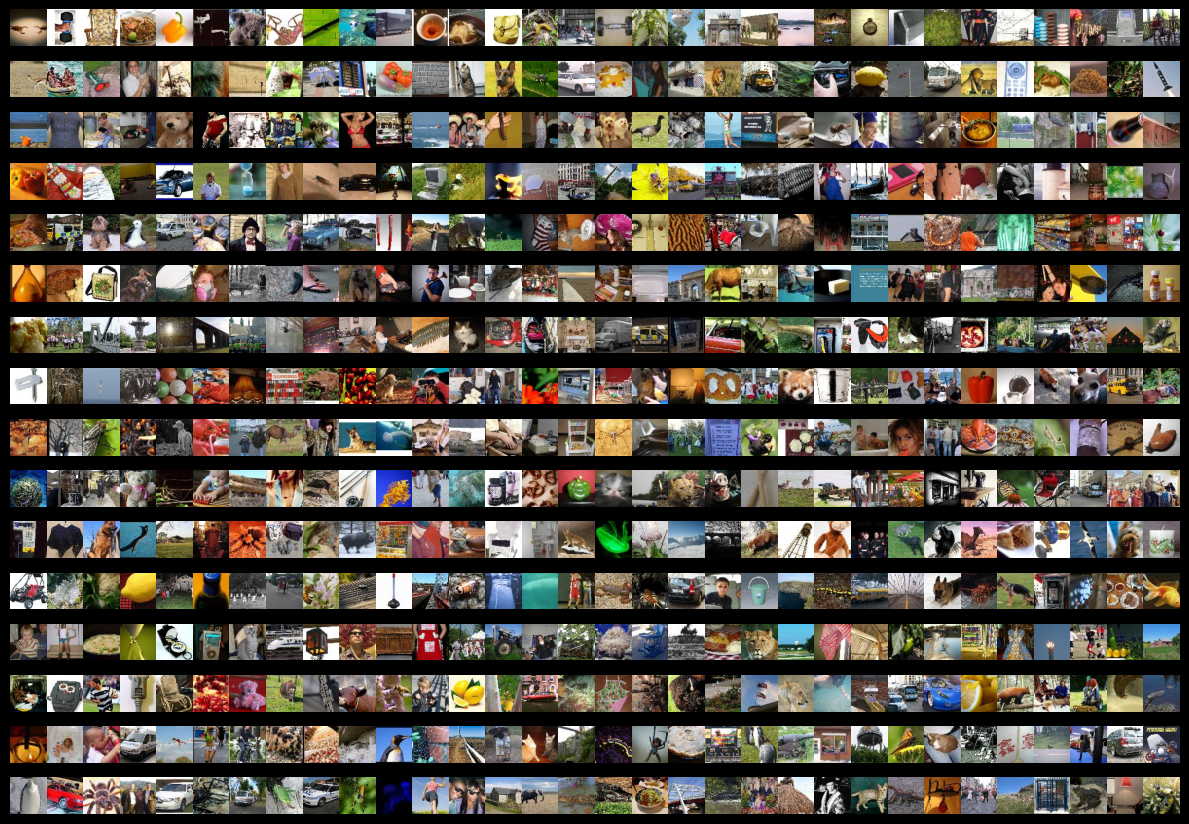

In [9]:
fig_filepath = os.path.join(folder, f"epoch_{epoch_i}_round_{round_i}_all.jpeg")

fig, axes = met.visualize_images(dataset, img_ids)

# fig.savefig(fig_filepath, dpi=300, bbox_inches='tight')

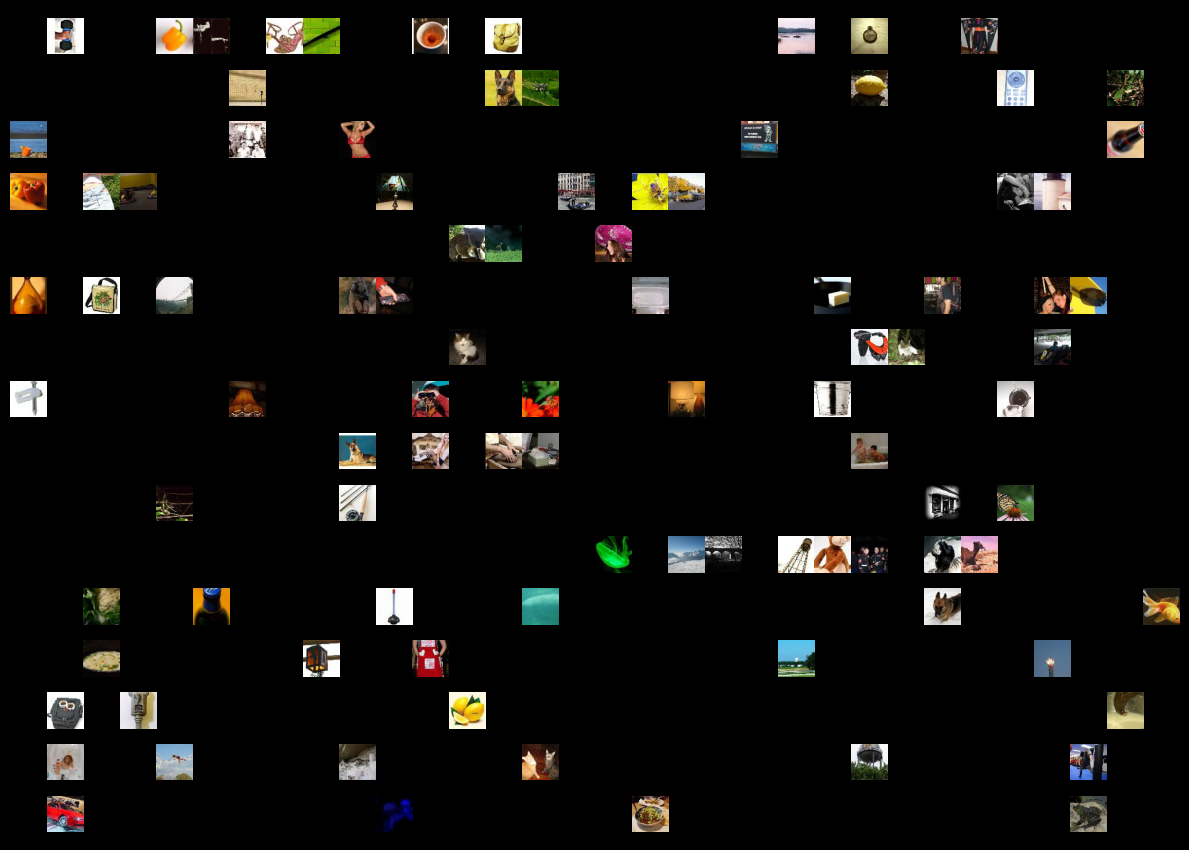

In [10]:
fig_filepath = os.path.join(folder, f"epoch_{epoch_i}_round_{round_i}_compared.jpeg")

fig, axes = met.visualize_images(dataset, img_ids, are_img_ids_selected)

# fig.savefig(fig_filepath, dpi=300, bbox_inches='tight')

### Show selected images per JEST iteration

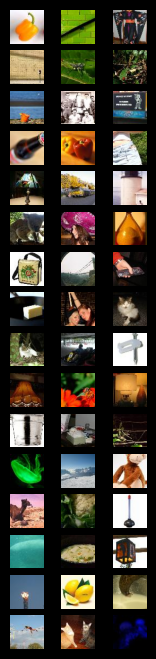

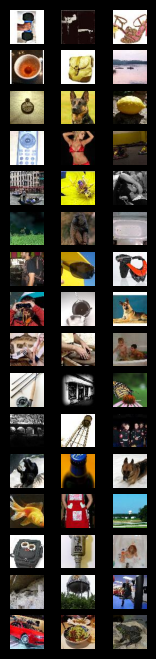

In [12]:
fig_filepath = os.path.join(folder, f"epoch_{epoch_i}__round_{round_i}_selected.jpeg")

img_ids = np.array(img_ids, dtype=np.int32)
are_img_ids_selected = np.array(are_img_ids_selected, dtype=bool)
fig_filepath = os.path.join(folder, f"epoch_{epoch_i}__round_{round_i}_selected_0.jpeg")
fig, axes = met.visualize_images_per_iteration(dataset, img_ids[0::2], are_img_ids_selected[0::2], ajest_N)
# fig.savefig(fig_filepath, dpi=300, bbox_inches='tight')
fig_filepath = os.path.join(folder, f"epoch_{epoch_i}__round_{round_i}_selected_1.jpeg")
fig, axes = met.visualize_images_per_iteration(dataset, img_ids[1::2], are_img_ids_selected[1::2], ajest_N)
# fig.savefig(fig_filepath, dpi=300, bbox_inches='tight')

### Show comparison of labels seen and labels selected

In [19]:
epoch_i = 0
round_i = 0

round_indices = np.where(np.logical_and(indices_data[:,1]==epoch_i, 
                                        indices_data[:,2]==round_i))[0]
img_ids = indices_data[round_indices,-2]
are_img_ids_selected = indices_data[round_indices,-1].astype(bool)

<string>:17: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations


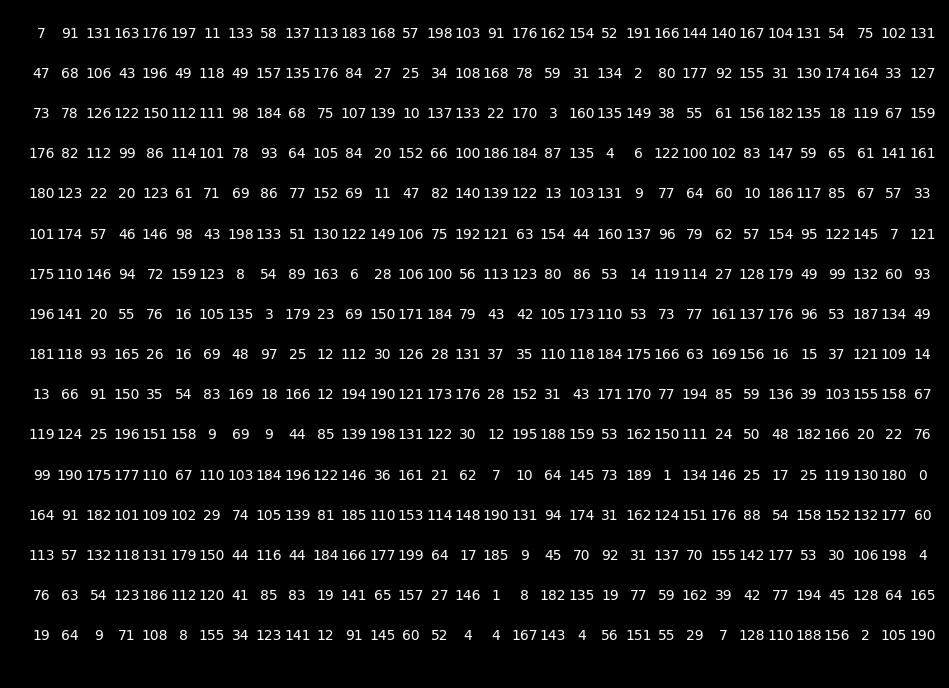

In [22]:
fig, axes = met.visualize_classes(dataset, img_ids)

<string>:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations


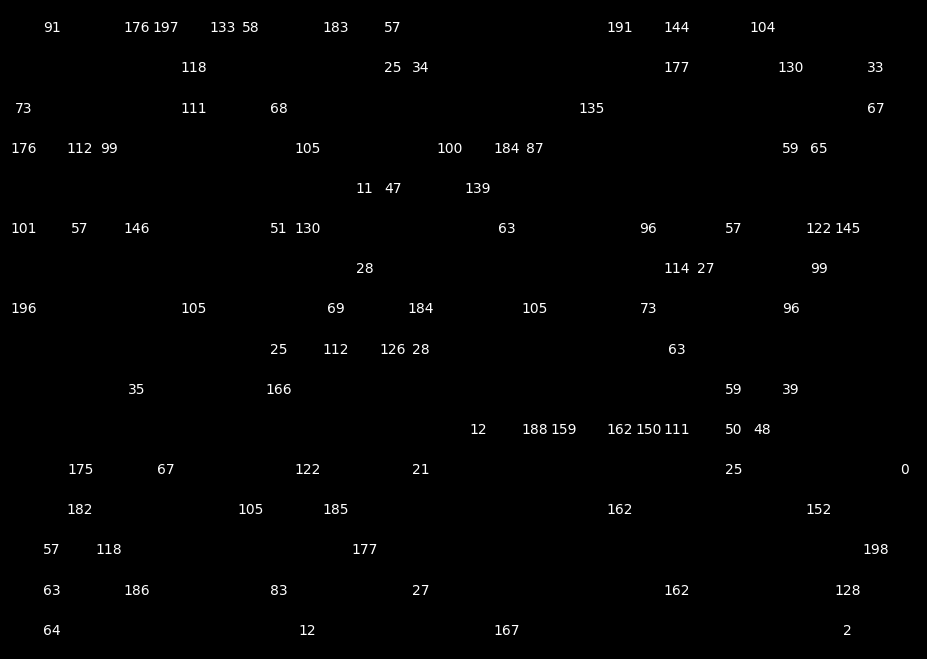

In [23]:
fig, axes = met.visualize_classes(dataset, img_ids, are_img_ids_selected)

### Show selected images per JEST iteration

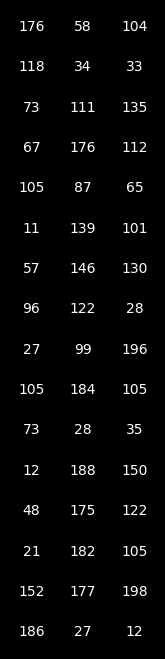

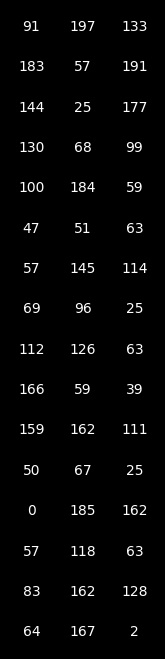

In [24]:
img_ids = np.array(img_ids, dtype=np.int32)
are_img_ids_selected = np.array(are_img_ids_selected, dtype=bool)
fig, axes = met.visualize_classes_per_iteration(dataset, img_ids[0::2], are_img_ids_selected[0::2], ajest_N)
# fig.savefig(fig_filepath, dpi=300, bbox_inches='tight')
fig, axes = met.visualize_classes_per_iteration(dataset, img_ids[1::2], are_img_ids_selected[1::2], ajest_N)
# fig.savefig(fig_filepath, dpi=300, bbox_inches='tight')

### Show histograms of labels seen and labels selected

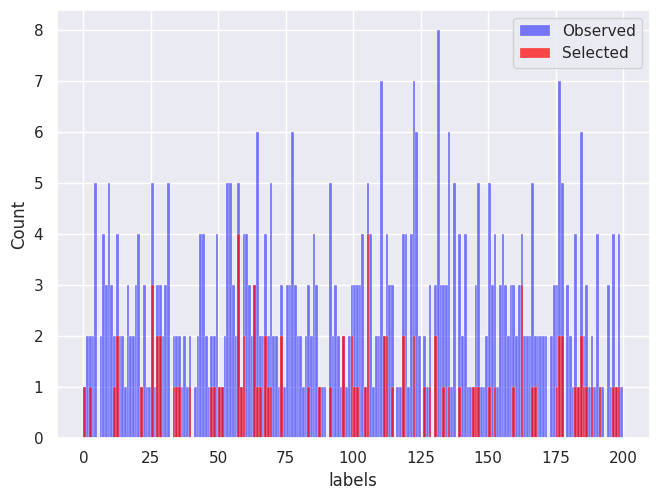

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='labels', ylabel='Count'>)

In [ ]:
met.plot_classes_histogram(dataset, img_ids, are_img_ids_selected)